As a culminating project, you'll be working with a dataset from ABC company, consisting of 458 rows and 9 columns. The company requires a comprehensive report detailing information about their employees across various teams. Your tasks include preprocessing the dataset, analyzing the data, and presenting your findings graphically. Here's a breakdown of what you need to do:

Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

Analysis Tasks:
1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
2. Segregate employees based on their positions within the company.
3. Identify the predominant age group among employees.
4. Discover which team and position have the highest salary expenditure.
5. Investigate if there's any correlation between age and salary, and represent it visually.

Download the dataset from this link.
 https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/edit?usp=share_link


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel("myexcel.xlsx")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,178,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,150,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,4833969
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,Unknown,5000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      458 non-null    object
 1   Team      458 non-null    object
 2   Number    458 non-null    int64 
 3   Position  458 non-null    object
 4   Age       458 non-null    int64 
 5   Height    458 non-null    int64 
 6   Weight    458 non-null    int64 
 7   College   458 non-null    object
 8   Salary    458 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 32.3+ KB


In [35]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College      0
Salary       0
Age Group    0
dtype: int64

In [15]:
df.describe()

,Number,Age,Height,Weight,Salary
count,458.000000,458.000000,458.000000,458.000000,4.580000e+02
mean,17.713974,26.934498,165.587336,221.543668,4.833970e+06
std,15.966837,4.400128,9.123875,26.343200,5.163335e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,158.000000,200.000000,1.100150e+06
50%,13.000000,26.000000,166.000000,220.000000,2.862190e+06
75%,25.000000,30.000000,174.000000,240.000000,6.323553e+06
max,99.000000,40.000000,180.000000,307.000000,2.500000e+07


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [7]:

# Group by 'Team' to calculate the number of players per team
team_distribution = df.groupby('Team')['Name'].count()
total_players = team_distribution.sum()

# Percentage split for each team
percentage_split = (team_distribution / total_players) * 100

result_df = pd.DataFrame({
    'Players': team_distribution,
    'Percentage': percentage_split
})

result_df


,Players,Percentage
Team,,
Atlanta Hawks,15,3.275109
Boston Celtics,15,3.275109
Brooklyn Nets,15,3.275109
Charlotte Hornets,15,3.275109
Chicago Bulls,15,3.275109
Cleveland Cavaliers,15,3.275109
Dallas Mavericks,15,3.275109
Denver Nuggets,15,3.275109
Detroit Pistons,15,3.275109


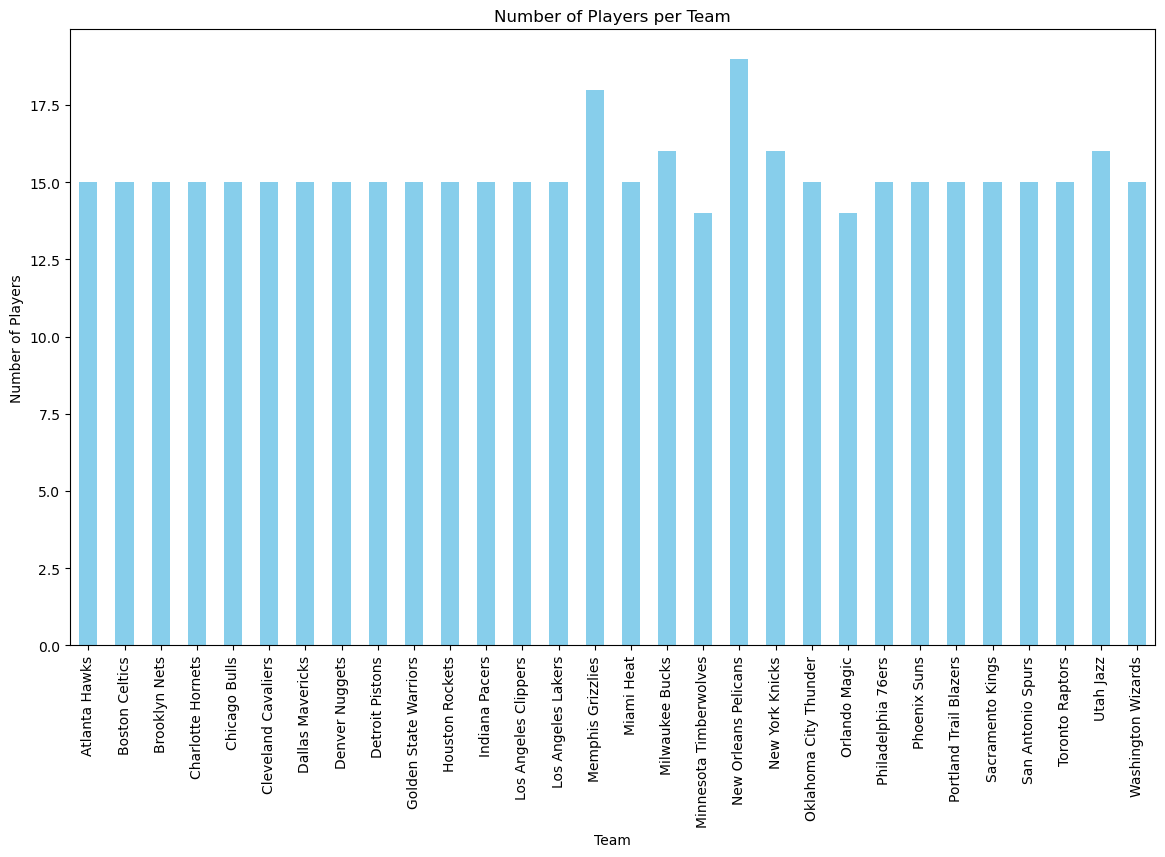

In [9]:
# Plotting a bar chart for the number of players per team
plt.figure(figsize=(14, 8))
result_df['Players'].plot(kind='bar', color='skyblue')

plt.title('Number of Players per Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()


2. Segregate employees based on their positions within the company. 

In [11]:
position = df.groupby('Position')['Name'].count()
position

Position
C      79
PF    100
PG     92
SF     85
SG    102
Name: Name, dtype: int64

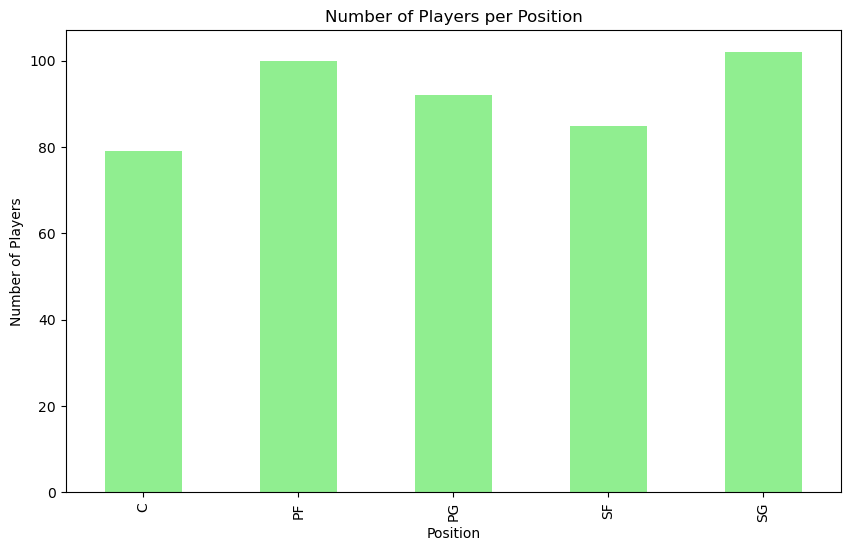

In [15]:
# Plotting a bar chart for the number of players per Position
plt.figure(figsize=(10, 6))
position.plot(kind='bar', color='lightgreen')
plt.title('Number of Players per Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


3. Identify the predominant age group among employees. 

In [37]:
# Define age bins (e.g., <20, 20-25, 25-30, etc.) and group ages accordingly
age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 100]
age_labels = ['<20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+']

# Create a new column with age groups and count the values
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_counts = df['Age Group'].value_counts().sort_values(ascending=False)

predominant_age_group = age_group_counts.idxmax(), age_group_counts.max()
predominant_age_group


('20-25', 179)

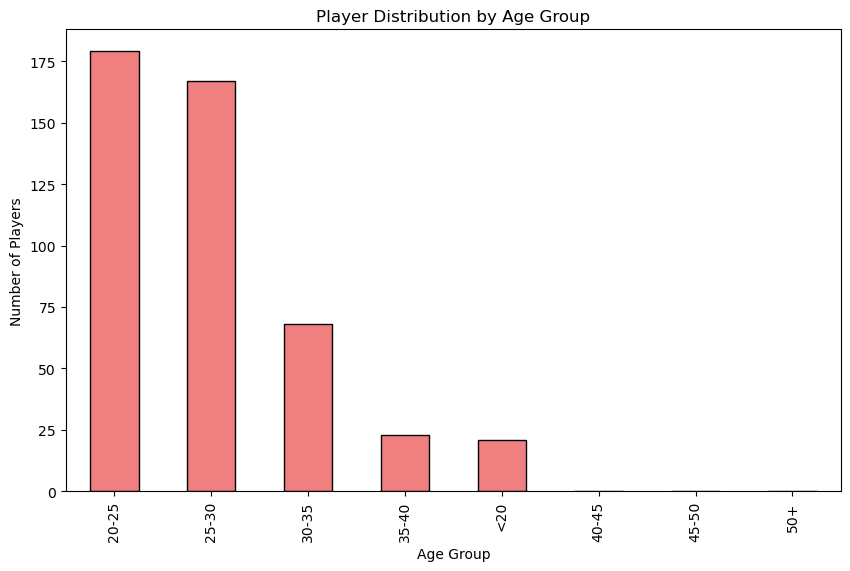

In [19]:
# Plotting a bar chart for the Player Distribution by Age Group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Player Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.show()


4. Discover which team and position have the highest salary expenditure.

In [21]:
# Group by 'Team' and sum up salaries to find the team with the highest salary expenditure
team_salary = df.groupby('Team')['Salary'].sum()
highest_team_salary = team_salary.idxmax(), team_salary.max()

# Group by 'Position' and sum up salaries to find the position with the highest salary expenditure
position_salary = df.groupby('Position')['Salary'].sum()
highest_position_salary = position_salary.idxmax(), position_salary.max()

highest_team_salary, highest_position_salary


(('Cleveland Cavaliers', 111822658), ('C', 466377332))

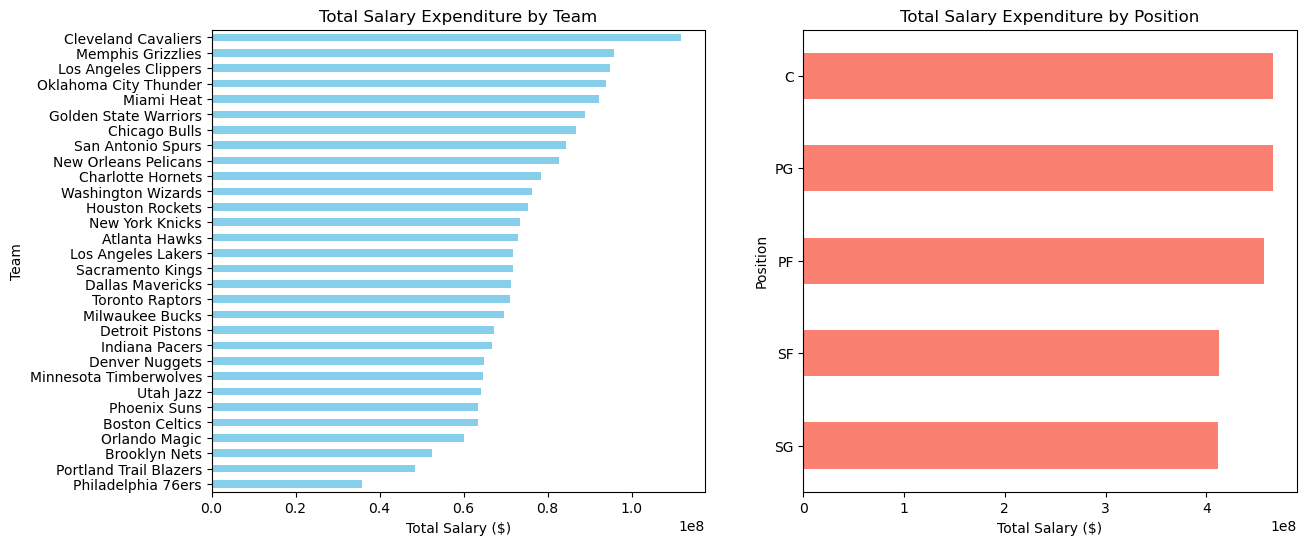

In [25]:
# Plotting the team and position with the highest salary expenditure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting salary expenditure by team
team_salary.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title("Total Salary Expenditure by Team")
axes[0].set_xlabel("Total Salary ($)")
axes[0].set_ylabel("Team")

# Plotting salary expenditure by position
position_salary.sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title("Total Salary Expenditure by Position")
axes[1].set_xlabel("Total Salary ($)")
axes[1].set_ylabel("Position")
plt.show()


5. Investigate if there's any correlation between age and salary, and represent it visually.

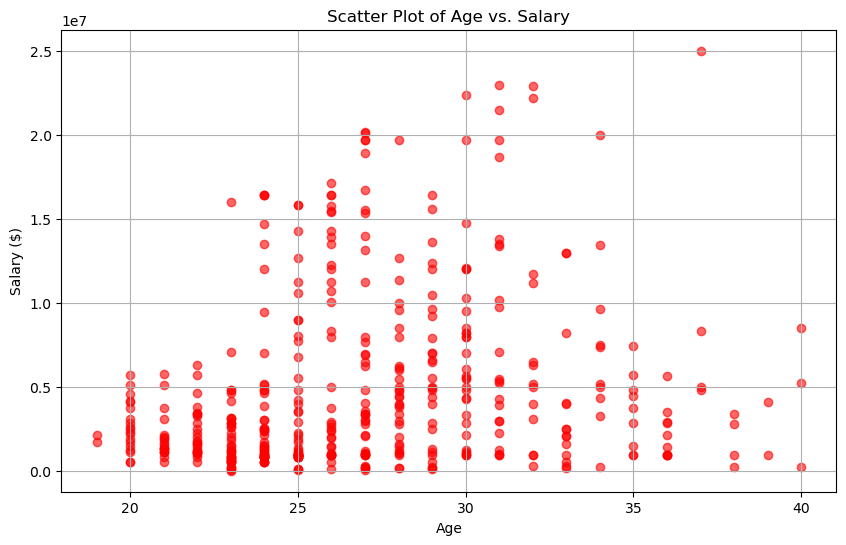

(0.21116954871839144, None)

In [33]:
# Calculate the correlation between Age and Salary
age_salary_correlation = df['Age'].corr(df['Salary'])
# Create a scatter plot to visualize the relationship between Age and Salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.6, color='red')
plt.title("Scatter Plot of Age vs. Salary")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.grid(True)
age_salary_correlation, plt.show()
